# Question 1 

In [1]:
# --- TEST Q1 --- #

from coc131_cw import COC131

classifier = COC131()

res1, res2 = classifier.q1()                            # Call q1 with no specified file name 
print('Flattened image shape (no file):', res1.shape)
print("Class Name (no file):", res2)

res1, res2 = classifier.q1('AnnualCrop_1.jpg')          # Call q1 with specific file name (in this case AnnualCrop_1.jpg)
print('Flattened image shape (with file):', res1.shape)
print('Class Name (with file):', res2)
         
print('Dataset (samples) shape:', classifier.x.shape)   # Ouput shape of the dataset (samples)
print('Unique labels:', set(classifier.y))              # Output list of unique labels




Flattened image shape (no file): (1,)
Class Name (no file): 
Flattened image shape (with file): (3072,)
Class Name (with file): AnnualCrop
Dataset (samples) shape: (26733, 32, 32, 3)
Unique labels: {'AnnualCrop', 'Industrial', 'PermanentCrop', 'Forest', 'SeaLake', 'Highway', 'Residential', 'HerbaceousVegetation', 'River', 'Pasture'}


# Quesion 2

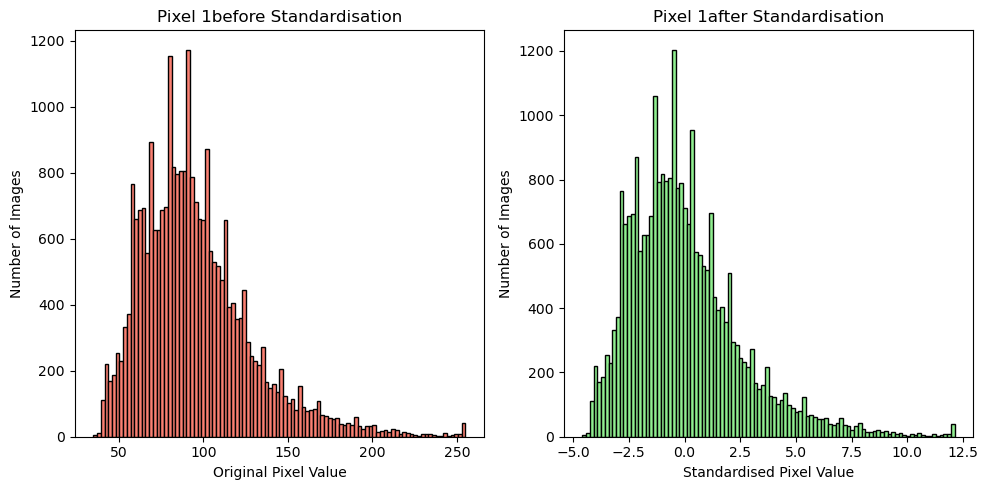


Original Means of first 5 features:
[ 86.09022556  95.3379718  102.78951109  86.0990536   95.18011447]

Means of first 5 features after standardisation:
[ 1.27912577e-16 -2.53221011e-15  6.86853036e-14 -4.63854610e-15
  1.26218981e-15]
These means should be almost 0.

Original Standard Deviations of first 5 features:
[50.5439193  32.93780188 27.05835384 49.97865242 32.47003098]

Standard Deviations of first 5 features after standardisation:
[2.5 2.5 2.5 2.5 2.5]
These standard deviations should be almost 2.5.


In [2]:
# --- TEST Q2 --- #

import numpy as np
import matplotlib.pyplot as plt

from coc131_cw import COC131

classifier = COC131()

classifier.q1()         # Load image dataset

flattenedData = classifier.x.reshape(classifier.x.shape[0], -1)     # Flatten image data

res1, res2 = classifier.q2(flattenedData)       # Call q2 to standardise data

pixelNum = 1     # Pixel number for example (pixel 1)

# Generate visualisation showing impact of standardisation on the dataset
plt.figure(figsize = (10, 5))

# Plot graph showing the distribution of data before standardisation for a specific pixel (in this case pixel 1)
plt.subplot(1, 2, 1)
plt.hist(flattenedData[:, pixelNum], bins = 100, color = 'salmon', edgecolor = 'black')
plt.title('Pixel ' + str(pixelNum) + 'before Standardisation')
plt.xlabel('Original Pixel Value')          # Original pixel values
plt.ylabel('Number of Images')              # Number of images with this original pixel value for selected pixel

# Plot graph showing the distribution of data after standardisation for a specific pixel (in this case pixel 1)
plt.subplot(1, 2, 2)
plt.hist(res2[:, pixelNum], bins = 100, color = 'lightgreen', edgecolor = 'black')
plt.title('Pixel ' +  str(pixelNum) +  'after Standardisation')
plt.xlabel('Standardised Pixel Value')      # Standardised pixel values
plt.ylabel('Number of Images')              # Number of images with this standardised pixel value for selected pixel

plt.tight_layout()
plt.savefig('q2.png')  
plt.show()

print('\nOriginal Means of first 5 features:')      # Output Means of first 5 features before standardisation
print(res1['means'][:5])

print('\nMeans of first 5 features after standardisation:')        # Output Means of first 5 features after standardisation
print(np.mean(res2, axis = 0)[:5])  
print('These means should be almost 0.')

print('\nOriginal Standard Deviations of first 5 features:')    # Output Standard Deviations of first 5 features before standardisation
print(res1['standardDeviations'][:5])

print('\nStandard Deviations of first 5 features after standardisation:')   # Output Standard Deviations of first 5 features after standardisation
print(np.std(res2, axis = 0)[:5])  
print('These standard deviations should be almost 2.5.')





# Question 3

c:\Users\alext\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\alext\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\alext\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\alext\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\alext\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_pe

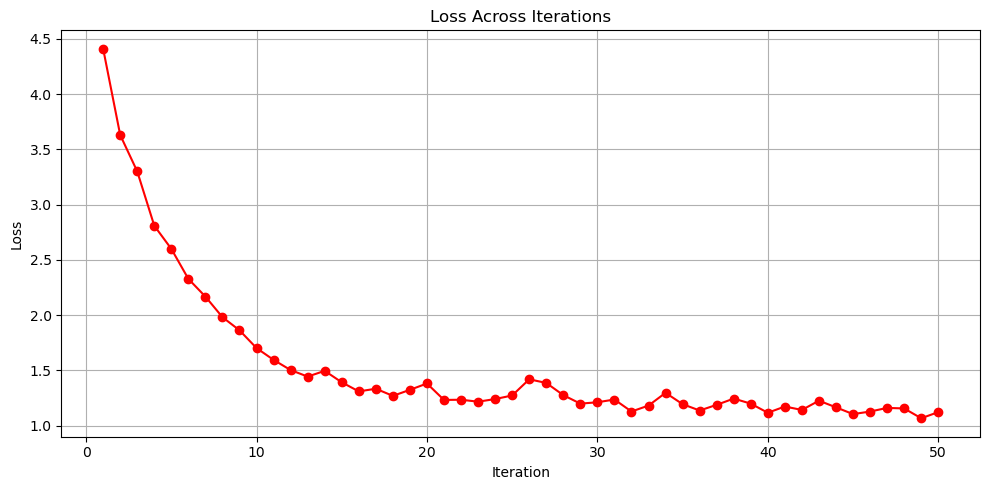

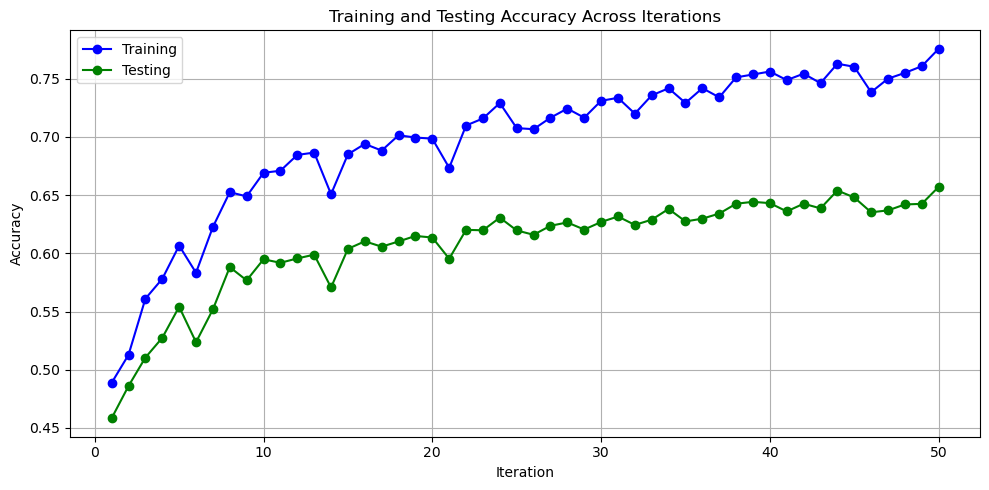

Optimal Hyperparameters:
{'hiddenLayerSize': (256, 128), 'alpha': 1}


In [3]:
# --- TEST Q3 --- #

import matplotlib.pyplot as plt
import coc131_cw

from coc131_cw import COC131

classifier = COC131()

classifier.q1()         # Load image dataset

model, losses, trainingAccuracies, testingAccuracies = classifier.q3()   # Call q3 to return model, losses, training and testing accuracies

# Plot graph showing losses across iterations
plt.figure(figsize = (10, 5))
plt.plot(range(1, len(losses) + 1), losses, marker = 'o', color ='red')
plt.title('Loss Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.savefig('q3-1.png')
plt.show()

# Plot graph showing training and testing accuracy across iterations 
plt.figure(figsize = (10, 5))
plt.plot(range(1, len(trainingAccuracies) + 1), trainingAccuracies, label = 'Training', marker = 'o', color = 'blue')
plt.plot(range(1, len(testingAccuracies) + 1), testingAccuracies, label = 'Testing', marker = 'o', color = 'green')
plt.title('Training and Testing Accuracy Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('q3-2.png')
plt.show()

print('Optimal Hyperparameters:')       # Output optimal hyperparameters
print(coc131_cw.optimal_hyperparam)

Note:
q4 and q5 were tested using the optimal hyperparameters gathered from q3, however, upon later re-running q3, new optimal hyperparameters were selected.
Due to time constraints, q4 and q5 were not able to be re-run using these updated hyperparameters due to the large run times on this device, however the logic, strcture and functionality of these functions are still valid and produce the intended outcomes.
Both of these functions corretly used the previous optimal hyperparameters to come generate their final results and visualisations.

# Question 4

<class 'dict'>
{'alphas': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 50, 100], 'accuracies': [0.6167082294264339, 0.6155860349127182, 0.6274314214463841, 0.6102244389027431, 0.6016209476309227, 0.6329177057356609, 0.6392768079800498, 0.662718204488778, 0.6795511221945137, 0.6609725685785536, 0.635785536159601, 0.5178304239401497, 0.42668329177057357], 'weights': [[array([[ 0.13368166,  0.06946474, -0.03983343, ..., -0.04581389,
         0.06318024, -0.08768188],
       [ 0.15405663,  0.00039932, -0.14103606, ...,  0.09659711,
         0.11971624, -0.13824359],
       [ 0.16928861, -0.1449394 , -0.14004055, ...,  0.03324522,
        -0.02281715, -0.04643002],
       ...,
       [-0.04745816,  0.10778792,  0.07076248, ...,  0.00691808,
         0.03354708,  0.01192608],
       [ 0.0041901 ,  0.0613927 , -0.04368462, ...,  0.04469508,
         0.06878121, -0.09645641],
       [-0.06112293,  0.15682805, -0.04541654, ..., -0.01929951,
         0.0752885 ,  0.02247696]]), array([[-

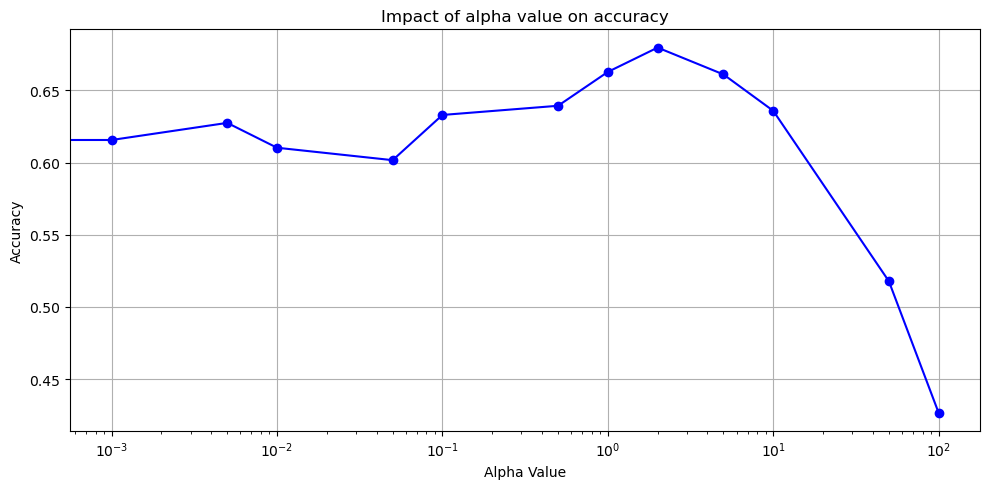

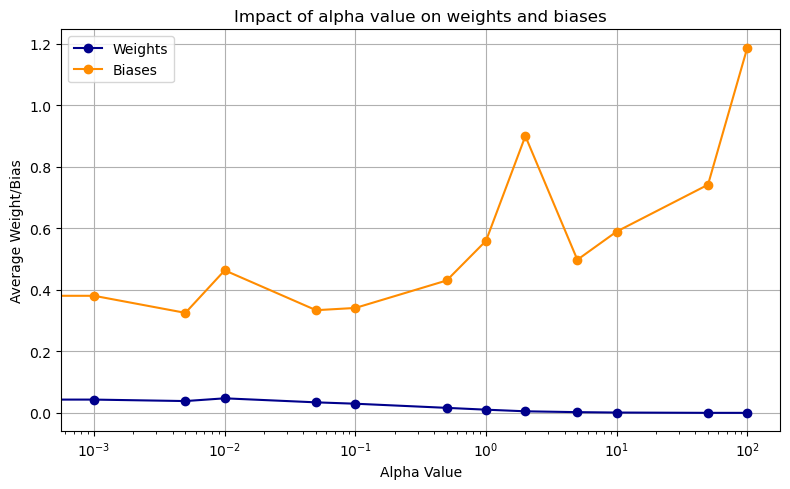

In [1]:
# --- TEST Q4 --- #

import numpy as np
import matplotlib.pyplot as plt

from coc131_cw import COC131

classifier = COC131()

classifier.q1()                 # Load image dataset

res = classifier.q4()           # Call q4 to get data

alphas = res['alphas']          # Store data returned by q4
accuracies = res['accuracies']
weights = res['weights']
biases = res['biases']

# Plot graph showing impact of alpha value on accuracy
plt.figure(figsize = (10, 5))
plt.plot(alphas, accuracies, marker = 'o', color= 'blue')
plt.xscale('log')           # Please Note: There are equal spaces between values with unequal differences, for better visualisation
plt.xlabel('Alpha Value')   
plt.ylabel('Accuracy')
plt.title('Impact of alpha value on accuracy')
plt.grid(True)
plt.tight_layout()
plt.savefig('q4-1.png')
plt.show()


meanWeights = []    # Array to store mean weight for each model
meanBiases = []     # Array to store mean bias for each model

for i in range(len(alphas)):    # Iterate through each model model

    modelWeightLayers = weights[i]      # Store list of weight layers for model 
    modelBiasLayers = biases[i]         # Store list of bias layers for model 

    flattenedWeights = []               # Array to store all flattened weights
    flattenedBiases = []                # Array to store all flattened biases

    for modelWeightLayer in modelWeightLayers:  # Iterate through list of weight layers

        flattenedWeightLayer = modelWeightLayer.flatten()   # Store flattened weight layer

        for weight in flattenedWeightLayer:     # Iterate through flattened weight layer
            
            flattenedWeights.append(weight)     # Add flattened weight to flattened weights array


    for modelBiasLayer in modelBiasLayers:      # Iterate through list of bias layers

        flattenedBiasLayer = modelBiasLayer.flatten()       # Store flattened bias layer

        for bias in flattenedBiasLayer:         # Iterate through flattened bias layer

            flattenedBiases.append(bias)        # Add flattened bias to flattened biases array


    meanWeight = np.mean(np.abs(flattenedWeights))  # Calculate mean of absolute value of flattened weights
    meanBias = np.mean(np.abs(flattenedBiases))     # Calculate mean of absolute value of flattened biases

    meanWeights.append(meanWeight)      # Add mean weight to meanWeights array
    meanBiases.append(meanBias)         # Add meanBias to meanBiases array


# Plot graph showing impact of alpha value on weights and biases
plt.figure(figsize = (10, 5))
plt.plot(alphas, meanWeights, label = 'Weights', marker = 'o', color = 'blue')
plt.plot(alphas, meanBiases, label = 'Biases',  marker = 'o', color = 'green')
plt.xscale('log')           # Please Note: There are equal spaces between values with unequal differences, for better visualisation
plt.xlabel('Alpha Value')
plt.ylabel('Average Weight/Bias')
plt.title('Impact of alpha value on weights and biases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('q4-2.png')
plt.show()


# Question 5


c:\Users\alext\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Mean accuracy using Stratified CV: 0.6754952569282515
Mean accuracy using Non-Stratified CV: 0.682340230712111
P: 0.4240286053589252
Result: Splitting method had no effect


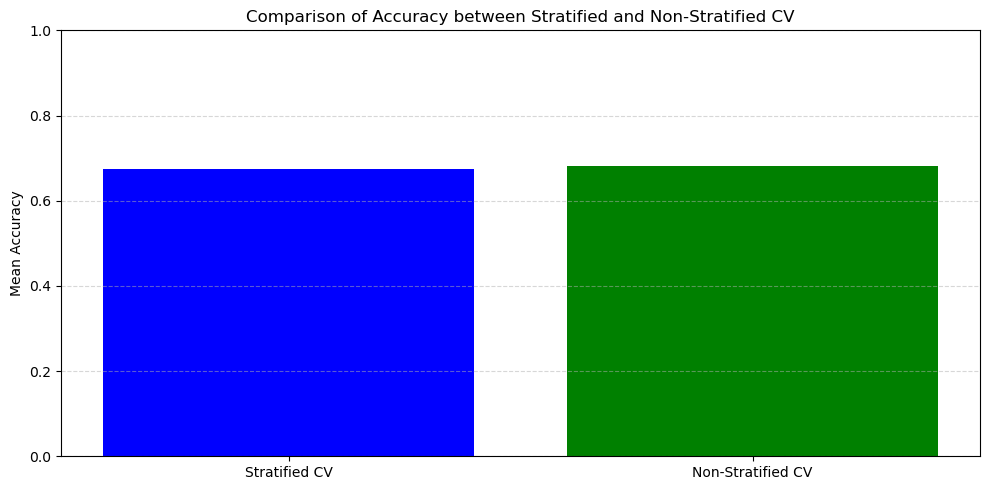

In [4]:
# --- TEST Q5 --- #

import matplotlib.pyplot as plt

from coc131_cw import COC131

classifier = COC131()

classifier.q1()         # Load image dataset

stratifiedAccuracy, nonStratifiedAccuracy, p, result = classifier.q5()   # Call q5 to conduct hypothesis test

# Output returned data
print('Mean accuracy using Stratified CV:', stratifiedAccuracy)
print('Mean accuracy using Non-Stratified CV:', nonStratifiedAccuracy)
print('P:', p)
print('Result:', result)

accuracies = [stratifiedAccuracy, nonStratifiedAccuracy]    # Store stratified and non-stratified accuracies for plotting
labels = ['Stratified CV', 'Non-Stratified CV']             # Store bar labels

# Plot graph to show difference in accuracy between Stratified and Non-Stratified
plt.figure(figsize = (10, 5))
plt.bar(labels, accuracies, color = ['blue', 'green'])
plt.title('Comparison of Accuracy between Stratified and Non-Stratified CV')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1)                  
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.savefig('q5.png')
plt.show()

# Question 6

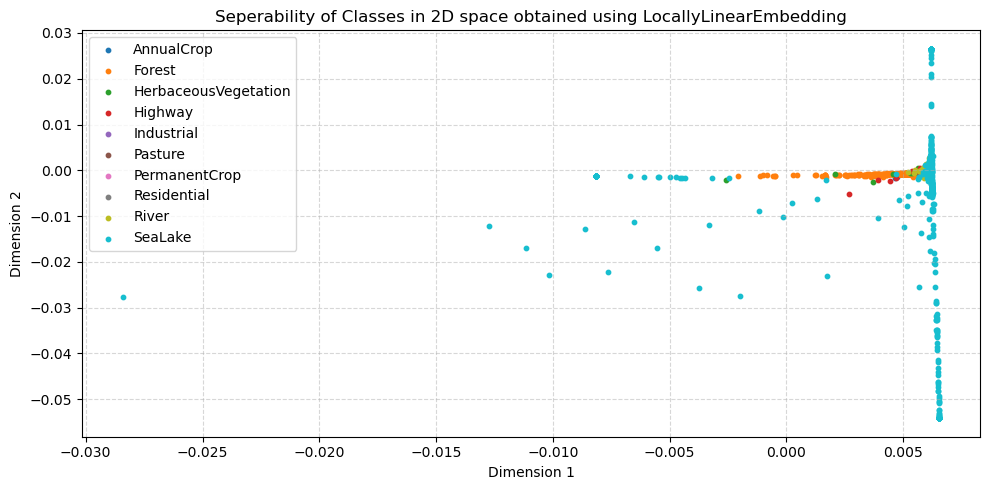

In [1]:
# --- TEST Q6 --- #

import matplotlib.pyplot as plt
import numpy as np

from coc131_cw import COC131

classifier = COC131()

classifier.q1()                     # Load image dataset

res = classifier.q6()               # Call q6 to apply LocallyLinearEmbedding to dataset to get 2D data

data = res['data']                  # Store 2D data from result
labels = res['labels']              # Store labels from result
uniqueLabels = np.unique(labels)    # Store list of unique labels

# Plot graph to show separability of the classes in 2D space obtained using LocallyLinearEmbedding
plt.figure(figsize=(10, 5))

for uniqueLabel in uniqueLabels:    # Iterate through list of unique labels

    location = (labels == uniqueLabel)     # Store location of unique label

    plt.scatter(data[location, 0], data[location, 1], label = uniqueLabel, s = 10)      # Plot all data points for unique label class    

plt.title('Seperability of Classes in 2D space obtained using LocallyLinearEmbedding')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.savefig('q6.png')
plt.show()